In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = ('/Users/carolinesklaver/Desktop/Capstone/NHANES/data/csv_data/')

import os
os.chdir(path)

In [25]:
df_raw = pd.read_csv('df_raw_v2.csv')

In [26]:
df_raw.head()

,SEQN,race_ethnicity,edu_level,#_ppl_household,age,gender,marital_status,annual_HI,depressed,caffeine,...,diastolic_BP,BMI,waist_C,year,#meals_fast_food,min_sedetary,doc_HPV,bone_mineral_density,difficult_hearing,doc_COPD
0,31131.0,4.0,4.0,4.0,44.0,2.0,1.0,12.0,0.0,1.300000e+01,...,74.0,30.90,96.0,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN
1,31132.0,3.0,5.0,2.0,70.0,1.0,1.0,12.0,0.0,2.600000e+02,...,60.0,24.74,96.5,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN
2,31134.0,3.0,3.0,2.0,73.0,1.0,1.0,NaN,0.0,1.420000e+02,...,68.0,30.63,117.1,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN
3,31139.0,2.0,NaN,3.0,18.0,2.0,5.0,12.0,0.0,5.397605e-79,...,64.0,29.45,84.0,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN
4,31143.0,3.0,NaN,3.0,19.0,1.0,5.0,12.0,0.0,5.397605e-79,...,62.0,22.57,84.2,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# bring target col to the beginning of df
dep = df_raw.pop('depressed')
df_raw.insert(1, 'depressed', dep)


In [28]:
df_raw.head()

,SEQN,depressed,race_ethnicity,edu_level,#_ppl_household,age,gender,marital_status,annual_HI,caffeine,...,diastolic_BP,BMI,waist_C,year,#meals_fast_food,min_sedetary,doc_HPV,bone_mineral_density,difficult_hearing,doc_COPD
0,31131.0,0.0,4.0,4.0,4.0,44.0,2.0,1.0,12.0,1.300000e+01,...,74.0,30.90,96.0,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN
1,31132.0,0.0,3.0,5.0,2.0,70.0,1.0,1.0,12.0,2.600000e+02,...,60.0,24.74,96.5,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN
2,31134.0,0.0,3.0,3.0,2.0,73.0,1.0,1.0,NaN,1.420000e+02,...,68.0,30.63,117.1,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN
3,31139.0,0.0,2.0,NaN,3.0,18.0,2.0,5.0,12.0,5.397605e-79,...,64.0,29.45,84.0,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN
4,31143.0,0.0,3.0,NaN,3.0,19.0,1.0,5.0,12.0,5.397605e-79,...,62.0,22.57,84.2,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN


# Handling Missing Values

In [29]:
def nan_helper(df):
    """
    The NaN helper

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of variables with NaN (index), 
    raw number missing, and their proportion
    
    """
    
    
    # get the raw number of missing values & sort
    missing = df.isnull().sum().sort_values(ascending=False)
    
    # get the proportion of missing values (%)
    proportion = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    
    # create table of missing data
    nan_data = pd.concat([missing, proportion], axis=1, keys=['missing', 'proportion'])
    
    return nan_data

In [30]:
nan_df = nan_helper(df_raw)

In [31]:
nan_df.head(20)

,missing,proportion
used_marijuana,28484,0.908378
doc_HPV,24586,0.784067
bone_mineral_density,22574,0.719903
doc_COPD,21376,0.681698
difficult_hearing,20806,0.663520
triglyceride,17072,0.544440
CRP,16193,0.516408
HIV,15536,0.495456
herpes_2,15464,0.493159
doc_osteoporosis,13222,0.421660


In [32]:
#continuous features
cont = ['#_ppl_household', 'age', 'triglyceride','caffeine', 'used_marijuana', 'lifetime_partners',
       'glycohemoglobin', 'CRP', 'tot_cholesterol','systolic_BP','diastolic_BP', 'BMI', 'waist_C', '#meals_fast_food',
       'min_sedetary', 'bone_mineral_density']

# binary/categorical features
cat = ['race_ethnicity', 'edu_level', 'gender', 'marital_status', 'annual_HI',
       'doc_diabetes', 'how_healthy_diet', 'used_CMH',
       'health_insurance', 'doc_asthma', 'doc_overweight', 'doc_arthritis',
       'doc_CHF', 'doc_CHD', 'doc_heart_attack', 'doc_stroke',
       'doc_chronic_bronchitis', 'doc_liver_condition', 'doc_thyroid_problem',
       'doc_cancer', 'difficult_seeing', 'doc_kidney', 'broken_hip',
       'doc_osteoporosis', 'vigorous_activity', 'moderate_activity',
       'doc_sleeping_disorder', 'smoker', 'sexual_orientation',
       'alcoholic','herpes_2', 'HIV', 'doc_HPV','difficult_hearing', 'doc_COPD']

# target binary feature
target = 'depressed'


# year?

In [33]:
def missing_values(df, threshold_col, threshold_row, impute_type):
    """
    Handle Missing Values

    Parameters
    ----------
    df : dataframe
    threshold_col: the proportion of missing values at which  to drop whole column
    threshold_row: the proportion of missing values at which to drop rows
    impute_type: mean or median imputation for continuous variables
    
    Returns
    ----------
    The dataframe without missing values
    
    """
    
    # Dropping Cols and Rows
    # call NaN helper function
    df_nan = nan_helper(df)
        
    # drop columns with higher proportion missing than threshold col
    df = df.drop((df_nan[df_nan['proportion'] > threshold_col]).index,1)
    
    # drop rows with higher proportion missing than threshold row
    df_nan_2 = df_nan[df_nan['proportion']>threshold_row]
    df = df.dropna(subset=np.intersect1d(df_nan_2.index, df.columns),
                           inplace=False)
    

    
    # Imputing values
    # 1. Impute continuous variables with mean 
    if impute_type == 'mean':
        for col in cont:
            if col in df.columns:
                df[col].fillna(df[col].mean(), inplace=True)
    # 1. Impute continuous variables with median
    elif impute_type == 'median':
        for col in cont:
            if col in df.columns:
                df[col].fillna(df[col].median(), inplace=True)
    
    
    # 2. Impute categorical variables with most frequent/mode
    for col in cat:
        if col in df.columns:
            df[col].fillna(df[col].value_counts().index[0], inplace=True)
    

    return df

In [29]:
df_new = missing_values(df_raw, 0.5, 0.5, "mean")

In [30]:
df_new.shape

(31357, 47)

## Build model to predict missing values

### Try linear model prediction

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
# take drugs as example
df_drugs = df_raw.dropna(axis=0, subset=['used_CMH', 'depressed'])
df_drugs = df_drugs.loc[:,['used_CMH', 'depressed']]

na_drugs = df_raw['used_CMH'].isnull()
# get target of missing data
dep_na_drugs = pd.DataFrame(df_raw['depressed'][na_drugs])

In [21]:
X = df_drugs[['used_CMH']]
y = df_drugs['depressed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

lm = LinearRegression().fit(X_train, y_train)

drug_pred = lm.predict(dep_na_drugs)

### NN to impute data

# Plots/Visuals

In [32]:
df_raw.columns

Index(['SEQN', 'race_ethnicity', 'edu_level', '#_ppl_household', 'age',
       'gender', 'marital_status', 'annual_HI', 'depressed', 'caffeine',
       'doc_diabetes', 'how_healthy_diet', 'used_marijuana', 'used_CMH',
       'health_insurance', 'doc_asthma', 'doc_overweight', 'doc_arthritis',
       'doc_CHF', 'doc_CHD', 'doc_heart_attack', 'doc_stroke',
       'doc_chronic_bronchitis', 'doc_liver_condition', 'doc_thyroid_problem',
       'doc_cancer', 'difficult_seeing', 'doc_kidney', 'broken_hip',
       'doc_osteoporosis', 'vigorous_activity', 'moderate_activity',
       'doc_sleeping_disorder', 'smoker', 'sexual_orientation',
       'lifetime_partners', 'alcoholic', 'triglyceride', 'tot_cholesterol',
       'glycohemoglobin', 'herpes_2', 'HIV', 'CRP', 'systolic_BP',
       'diastolic_BP', 'BMI', 'waist_C', 'year', '#meals_fast_food',
       'min_sedetary', 'doc_HPV', 'bone_mineral_density', 'difficult_hearing',
       'doc_COPD'],
      dtype='object')

In [198]:
demo = ['race_ethnicity', 'edu_level', '#_ppl_household', 'age',
       'gender', 'marital_status', 'annual_HI', 'depressed', 'health_insurance']

diagnoses = ['depressed','doc_diabetes','health_insurance', 'doc_asthma', 'doc_overweight', 'doc_arthritis',
       'doc_CHF', 'doc_CHD', 'doc_heart_attack', 'doc_stroke',
       'doc_chronic_bronchitis', 'doc_liver_condition', 'doc_thyroid_problem',
       'doc_cancer', 'difficult_seeing', 'doc_kidney', 'broken_hip', 'doc_sleeping_disorder',
       'doc_osteoporosis', 'doc_COPD','doc_HPV', 'difficult_hearing']

lifestyle = ['depressed', 'caffeine', 'how_healthy_diet', '#meals_fast_food', 'used_marijuana', 'used_CMH', 
                'smoker', 'sexual_orientation','lifetime_partners', 'alcoholic',
            'min_sedetary', 'vigorous_activity', 'moderate_activity']

laboratory = ['depressed', 'triglyceride', 'tot_cholesterol',
       'glycohemoglobin', 'herpes_2', 'HIV', 'CRP', 'systolic_BP',
       'diastolic_BP', 'BMI', 'waist_C', 'bone_mineral_density', ]

In [199]:
df_demo = df_raw[demo]
df_diagnoses = df_raw[diagnoses]
df_lifestyle = df_raw[lifestyle]
df_lab = df_raw[laboratory]

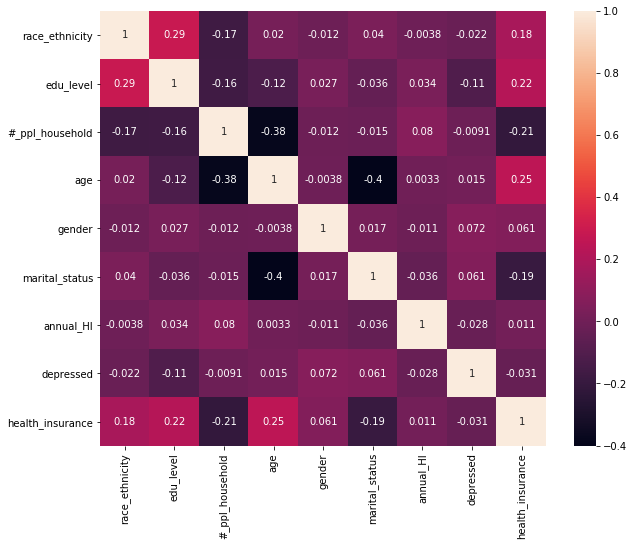

In [161]:
fig=plt.figure(figsize=(10, 8))

sns.heatmap(df_demo.corr(), annot=True)

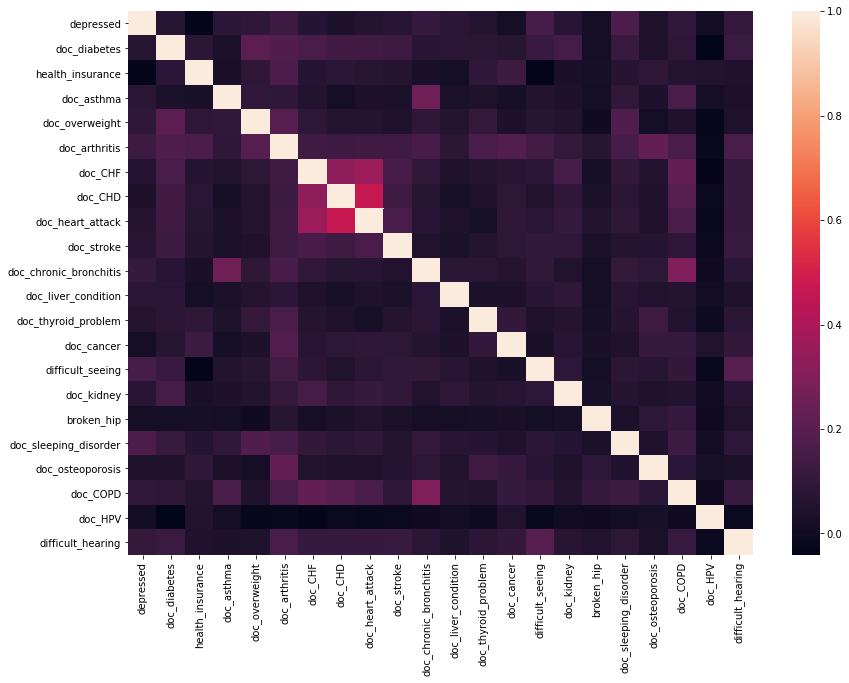

In [167]:
fig=plt.figure(figsize=(14, 10))

sns.heatmap(df_diagnoses.corr())

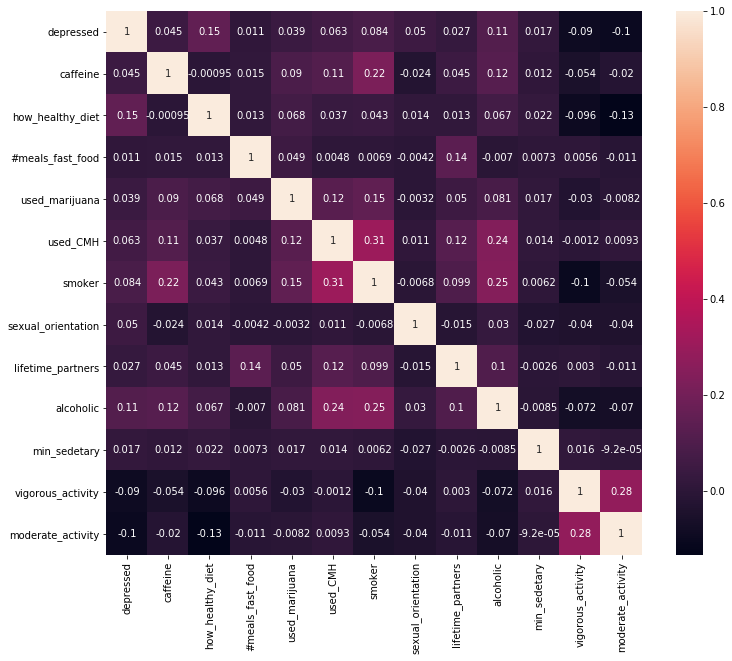

In [169]:
fig=plt.figure(figsize=(12, 10))

sns.heatmap(df_lifestyle.corr(), annot=True)

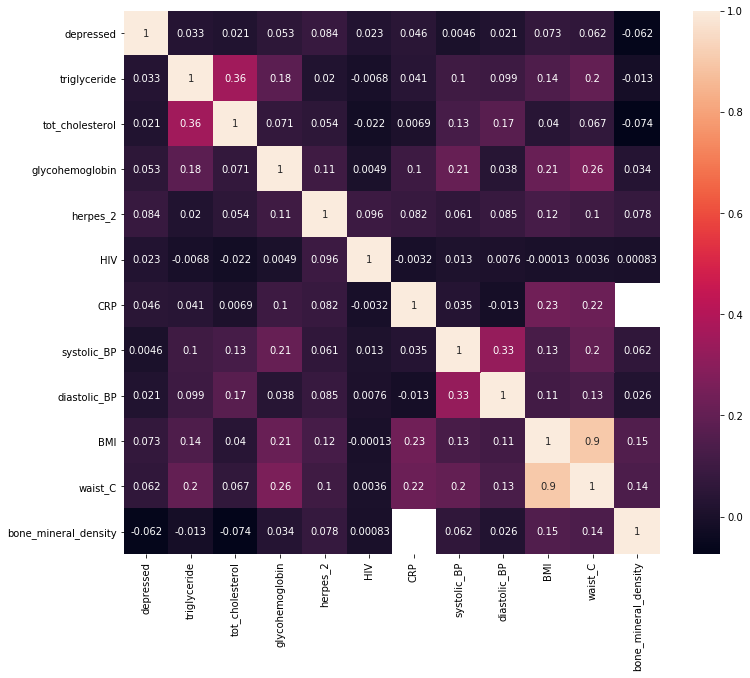

In [171]:
fig=plt.figure(figsize=(12, 10))

sns.heatmap(df_lab.corr(), annot=True)

In [216]:
df_raw.shape

(30145, 54)

In [47]:
# removing some outliers???

df_raw = df_raw.drop(df_raw[df_raw['caffeine'] > 1000].index)
df_raw = df_raw.drop(df_raw[df_raw['lifetime_partners'] > 50].index)
df_raw = df_raw.drop(df_raw[df_raw['tot_cholesterol'] > 400].index)
df_raw = df_raw.drop(df_raw[df_raw['triglyceride'] > 500].index)
df_raw = df_raw.drop(df_raw[df_raw['CRP'] > 5].index)
df_raw = df_raw.drop(df_raw[df_raw['#meals_fast_food'] > 500].index)

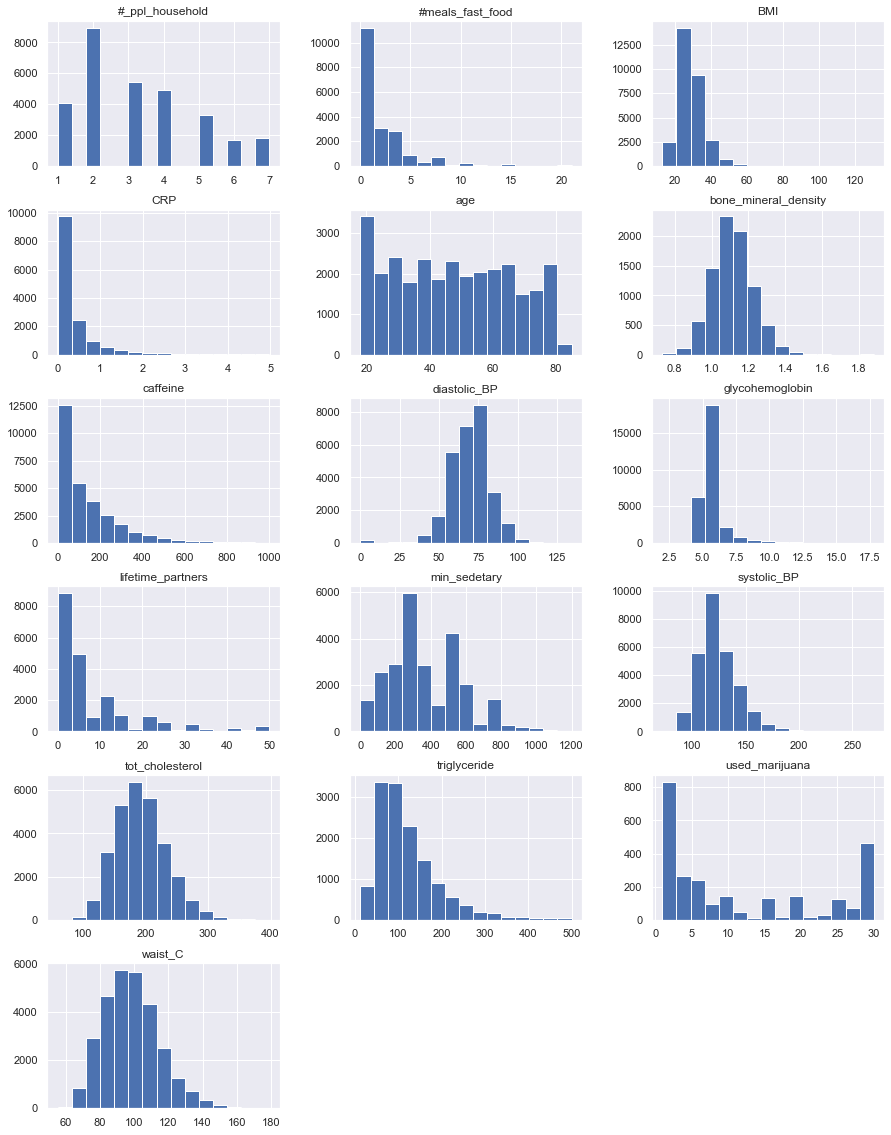

In [215]:
df_raw[cont].hist(bins=15, figsize=(15, 20), layout=(6, 3));

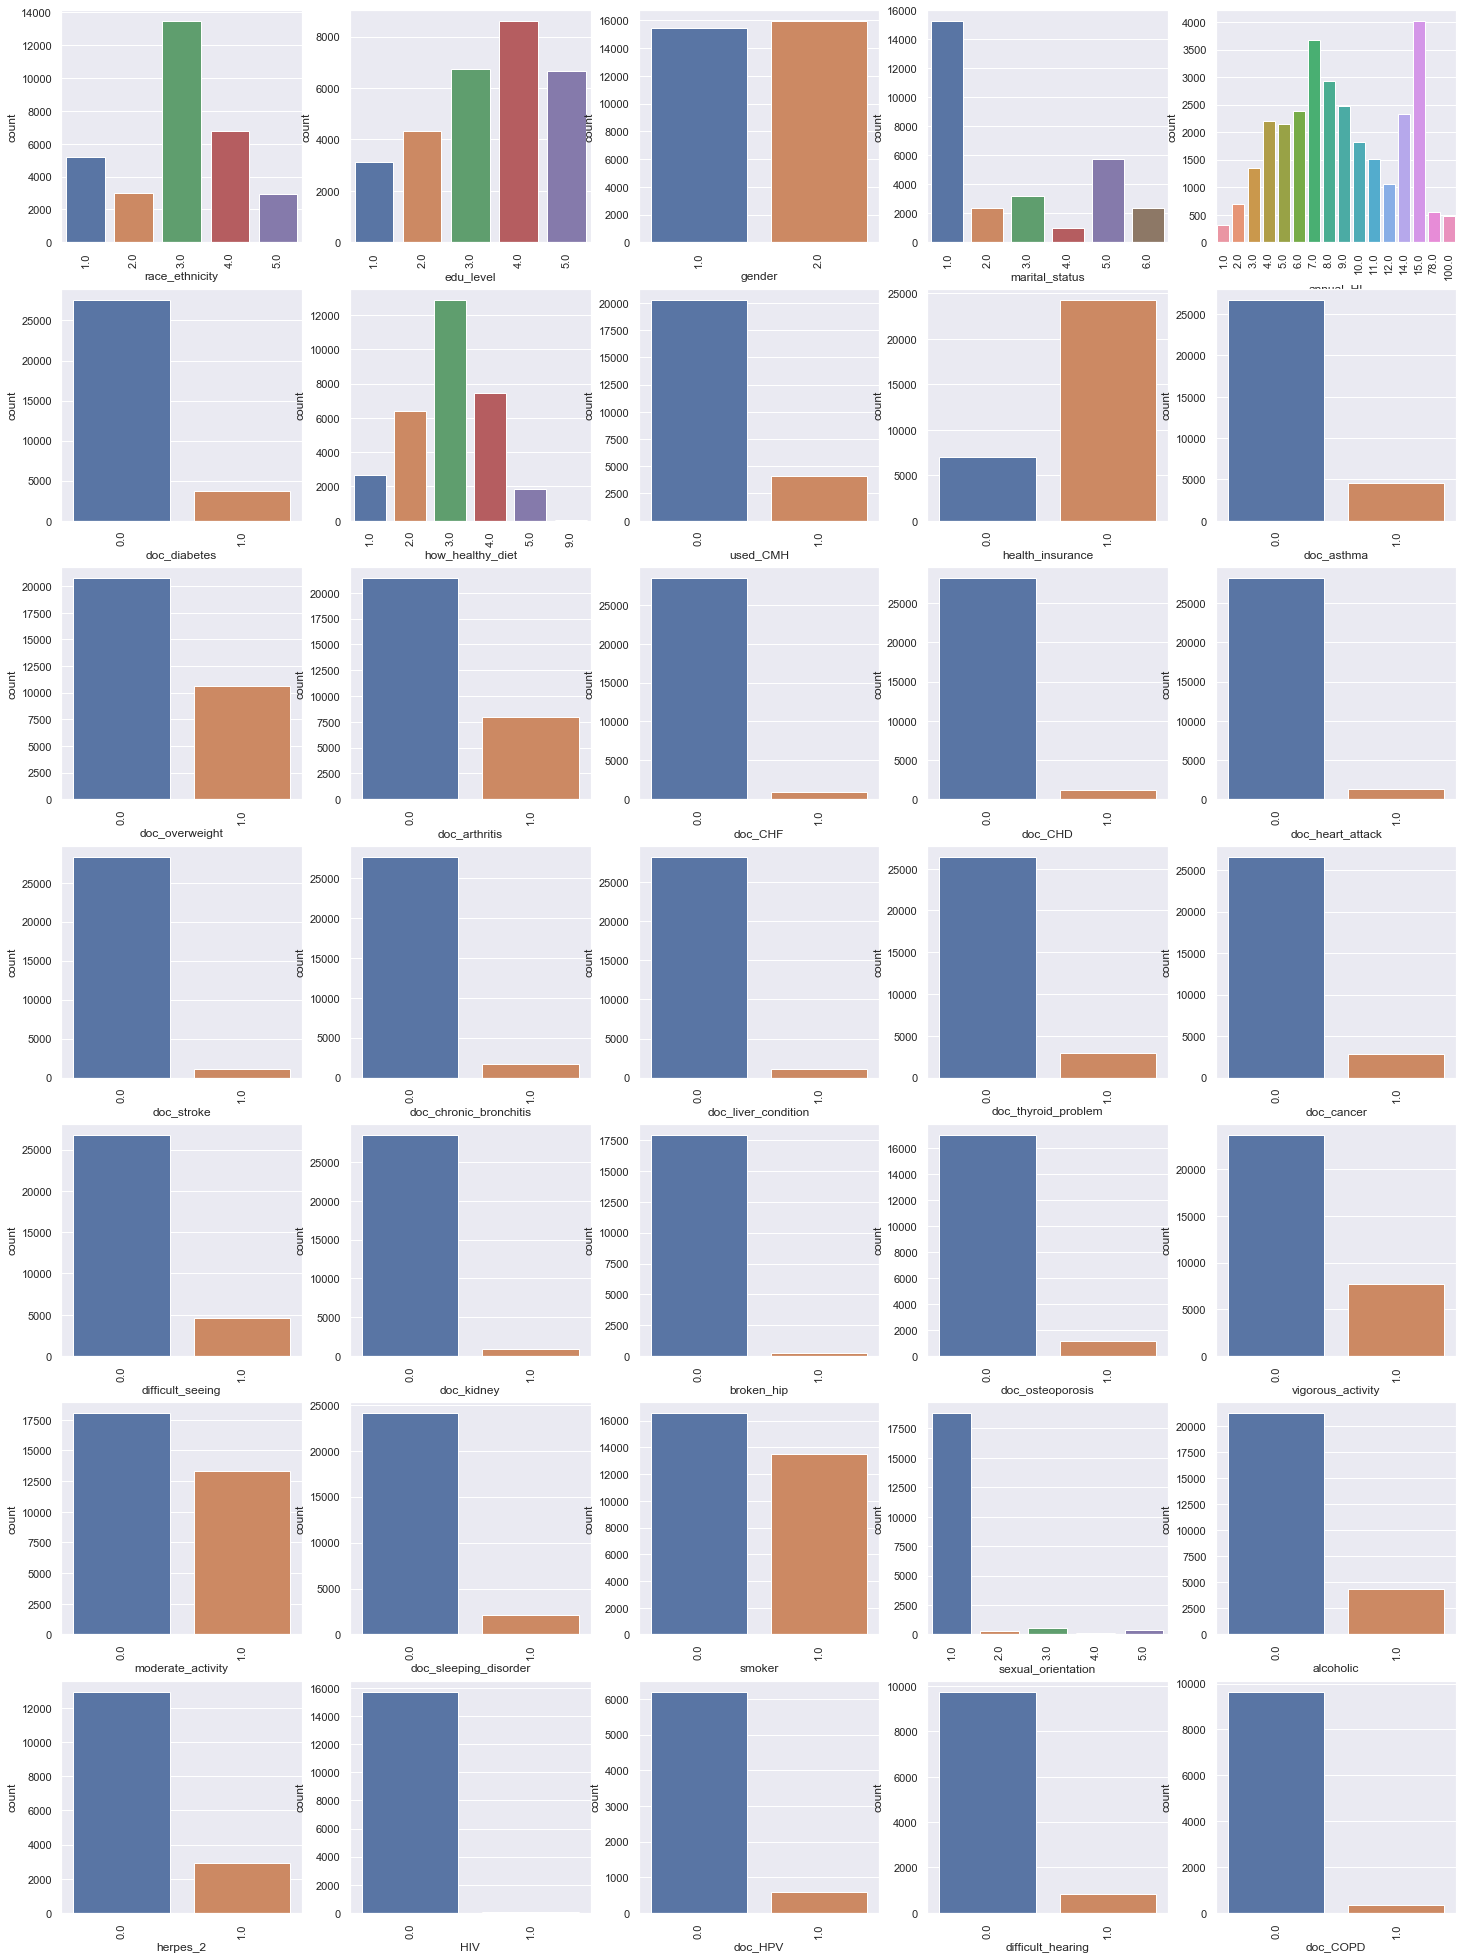

In [204]:
fig, ax = plt.subplots(7, 5, figsize=(25, 35))
for var, subplot in zip(cat, ax.flatten()):
    sns.countplot(df_raw[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

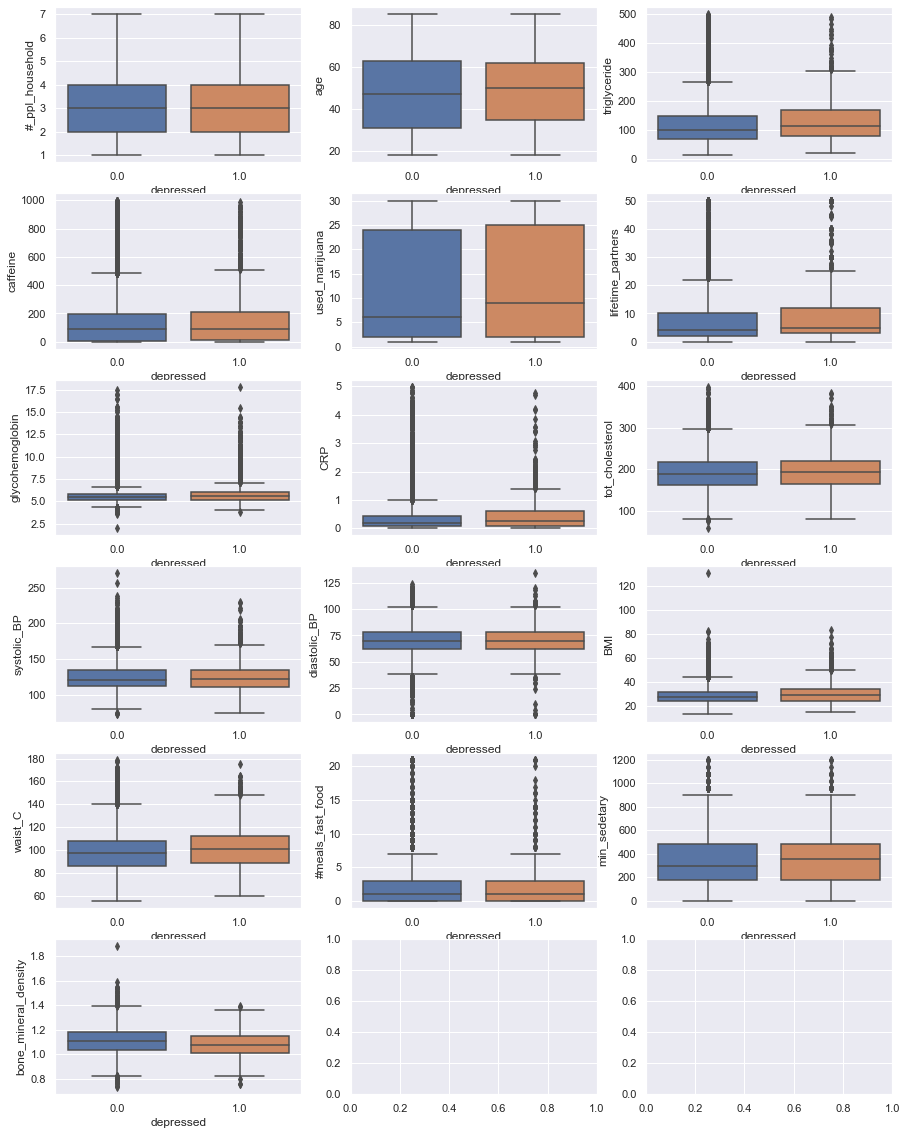

In [217]:
fig, ax = plt.subplots(6, 3,  figsize=(15, 20))
for var, subplot in zip(cont, ax.flatten()):
    sns.boxplot(x='depressed', y=var, data=df_raw, ax=subplot)

In [48]:
df_raw.to_csv('/Users/carolinesklaver/Desktop/Capstone/NHANES/data/csv_data/df_tab_2.csv', index=False)